<a href="https://colab.research.google.com/github/praveenbejo95/Bike-sharing-demand-prediction-ML-regression-project-/blob/main/Bike_Sharing_Demand_Prediction(Pravin_notebook)_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [349]:
# Importing required libraries

import numpy as np
import pandas as pd
from numpy import math
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [350]:
# Mounting google drive

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [351]:
path = '/content/drive/MyDrive/Colab Notebooks/2nd ML(regression) project/SeoulBikeData.csv'

In [352]:
# Loading the csv File

bike_df = pd.read_csv(path,  encoding= 'unicode_escape')
bike_df.head() # head of the data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [353]:
bike_df.shape #Looking at the shape of the dataset

(8760, 14)

In [354]:
bike_df.info()  #checks the datatypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

# **Preprocessing the dataset**
**Why do we need to handle missing values?**


* **The real-world data often has a lot of missing values. The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values.that's why we check missing values first**



In [355]:
#Let's count how many missing values we have

bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

###**Above result says that there are no missing values in the data thankfully**

# **Duplicate values**
**Why is it important to remove duplicate records from my data?**


* **"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set, Time and money are saved by not sending identical communications multiple times to the same person.**



In [356]:
# Checking Duplicate Values
value=len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


**In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.**

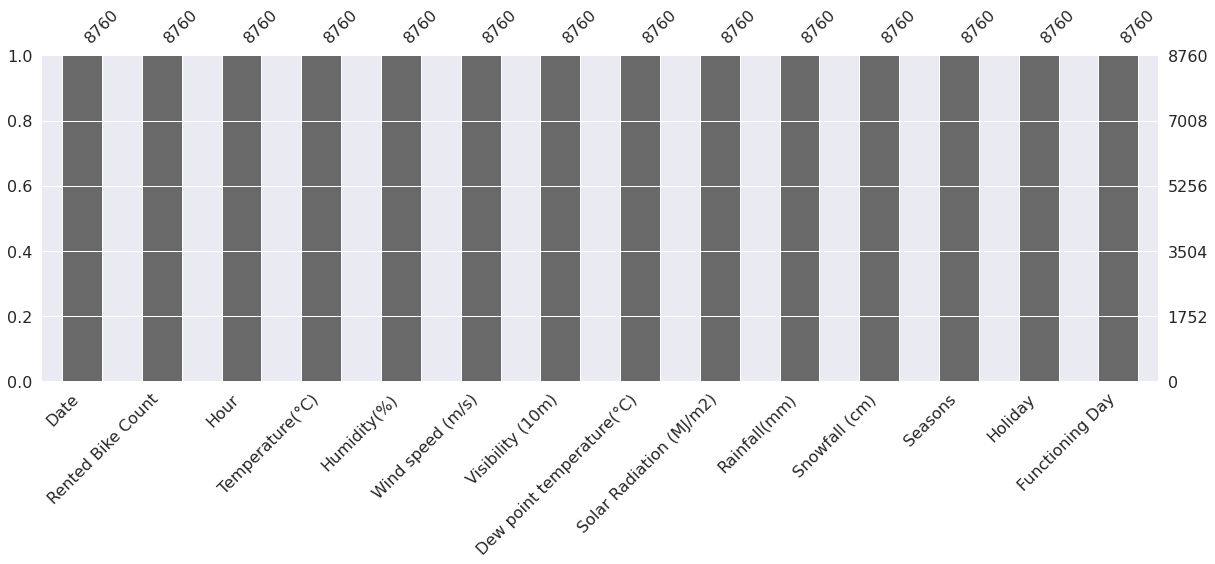

In [357]:
#Visualize missing data

import missingno as mn #this library shows the null values in a graph
mn.bar(bike_df,figsize = (20,6))

In [358]:
#Looking for the description of the dataset to get insights of the data

bike_df.describe().transpose() #Statistical aspect of the dataframe

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


# **Features description**
**Breakdown of Our Features:**

**Date :** The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count :** Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour:** The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C):** Temperature in Celsius, type : Float

**Humidity(%):** Humidity in the air in %, type : int

**Wind speed (m/s) :** Speed of the wind in m/s, type : Float

**Visibility (10m):** Visibility in m, type : int

**Dew point temperature(°C):** Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2):** Sun contribution, type : Float

**Rainfall(mm):** Amount of raining in mm, type : Float

**Snowfall (cm):** Amount of snowing in cm, type : Float

**Seasons:** Season of the year, type : str, there are only 4 season's in data .

**Holiday:** If the day is holiday period or not, type: str

**Functioning Day:** If the day is a Functioning Day or not, type : str

In [359]:
# finding the type of data of 'Date' column

bike_df['Date'].dtype

dtype('O')

In [360]:
# converting string format of 'Date' column into date-time format

bike_df['Date'] = pd.to_datetime(bike_df['Date'],format='%d/%m/%Y') # breaking the date column
bike_df['Date'].dtype

dtype('<M8[ns]')

In [361]:
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df['Dayofweek'] = bike_df['Date'].dt.weekday

In [362]:
# replace month number into words for better understanding

bike_df['month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],inplace=True)

In [363]:
# replace dayofweek number into words for better understanding

bike_df['Dayofweek'].replace([0,1,2,3,4,5,6],['Mon','Tues','Wed','Thur','Fri','Sat','Sun'],inplace=True)

In [364]:
# let's see the head of the data now

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,year,month,Dayofweek
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,Dec,Fri


# **Performing EDA on the dataset**
**Why do we perform EDA?**


* **An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**



In [365]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


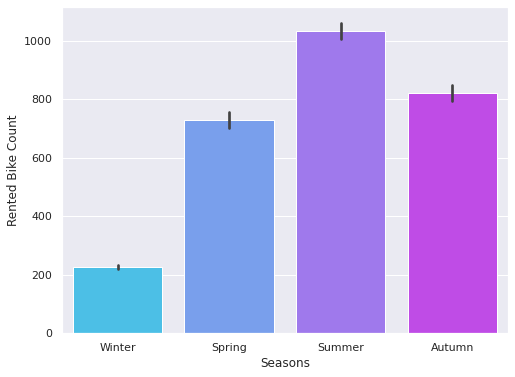

In [366]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.barplot(bike_df['Seasons'],bike_df['Rented Bike Count'],palette='cool')

**conclusions from above pie chart:**

**1.most bikes have been rented in the summer season.**

**2.least bike rent count is in winter season.**

**3.autumn and spring seasons have almost equal amounts of bike rent count.**

[Text(0.5, 1.0, 'Count of Rented bikes acording to seasons ')]

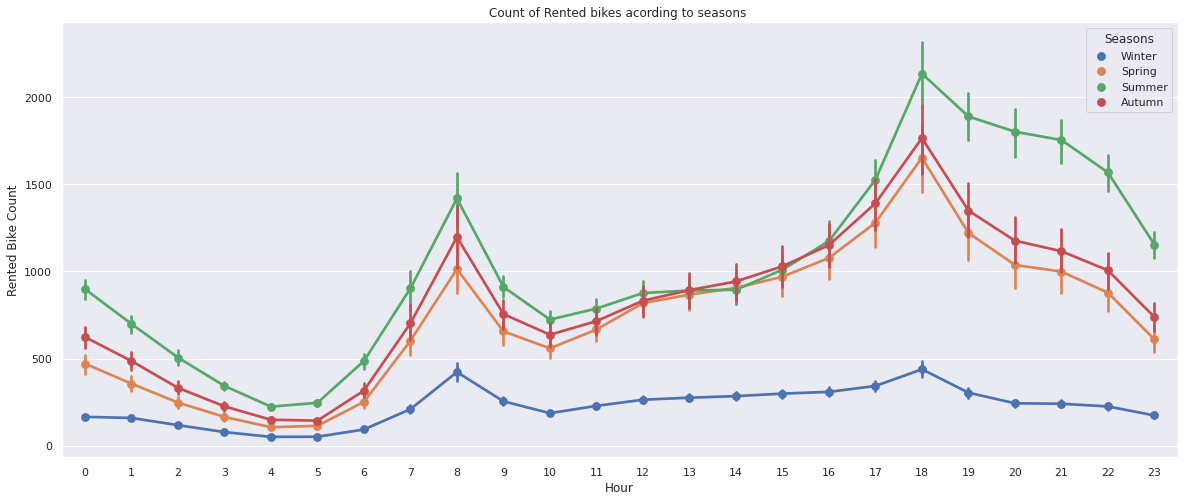

In [367]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title='Count of Rented bikes acording to seasons ')

In [368]:
bike_df['year'].value_counts()

2018    8016
2017     744
Name: year, dtype: int64

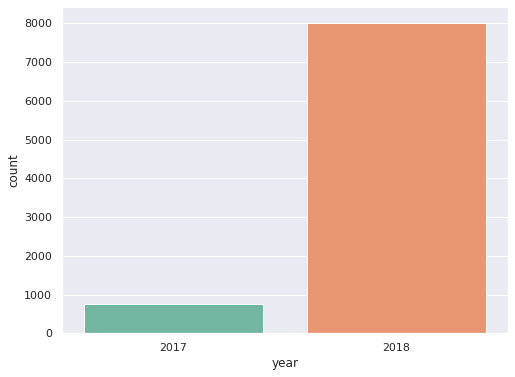

In [369]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = 'year', data = bike_df,palette='Set2')

**Above plot shows that most of the bikes have been rented in the year 2018.**

In [370]:
# creating a series which shows total number of bikes rented on the type of day

df_hol = bike_df.groupby('Holiday').sum()['Rented Bike Count']

In [371]:
df_hol

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64

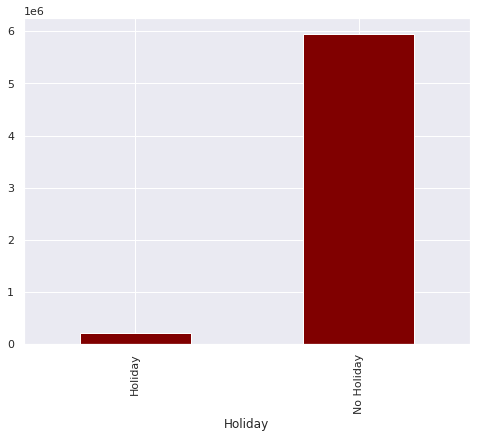

In [372]:
plt.figure(figsize=(8,6))
sns.set_theme(style='darkgrid')
df_hol.plot(kind='bar',color = 'maroon')

**Above plot shows that most of the bikes have been rented on working days.**

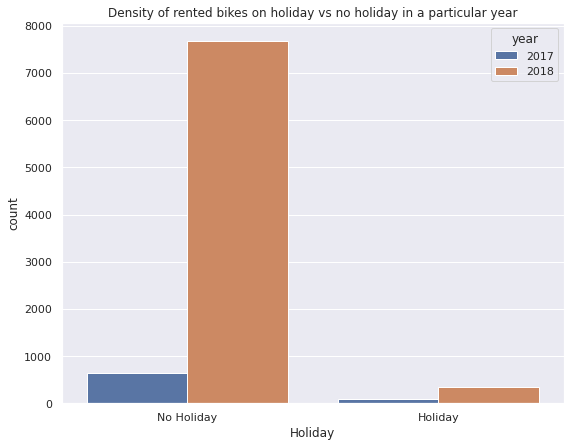

In [373]:
# bikes rented on type of day in each year

plt.figure(figsize=(9,7))
sns.countplot(x='Holiday', hue = 'year', data= bike_df)
plt.title('Density of rented bikes on holiday vs no holiday in a particular year')
plt.show()

[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday ')]

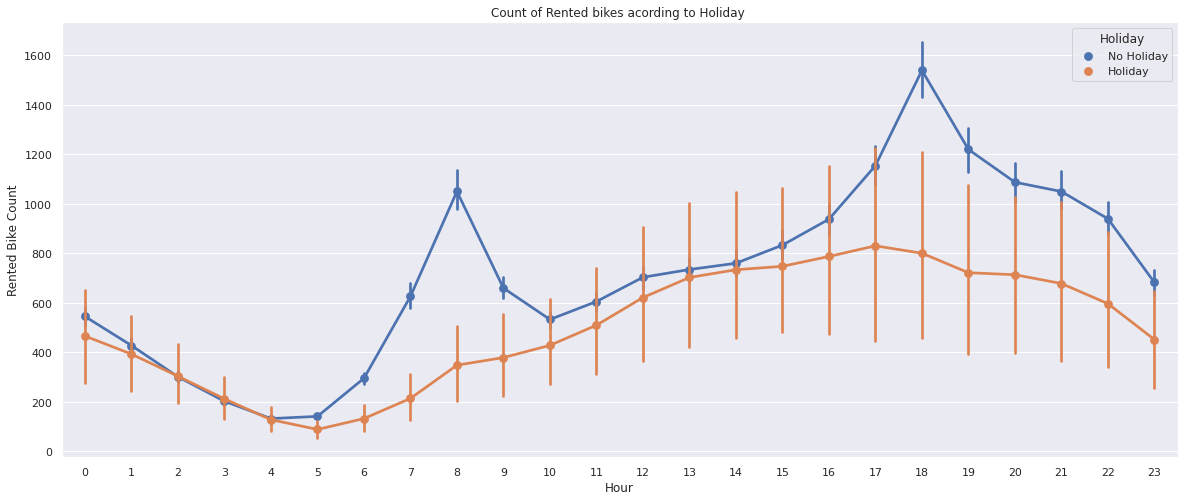

In [374]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


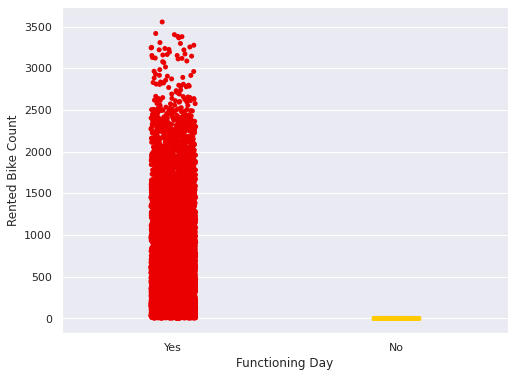

In [375]:
# showing the fuctioning day on rented bike count

plt.figure(figsize=(8,6))
sns.stripplot(bike_df['Functioning Day'],bike_df['Rented Bike Count'],jitter=True,palette='hot')

**Above plot show that bike was rented when there is more fuctioning day**

[Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day ')]

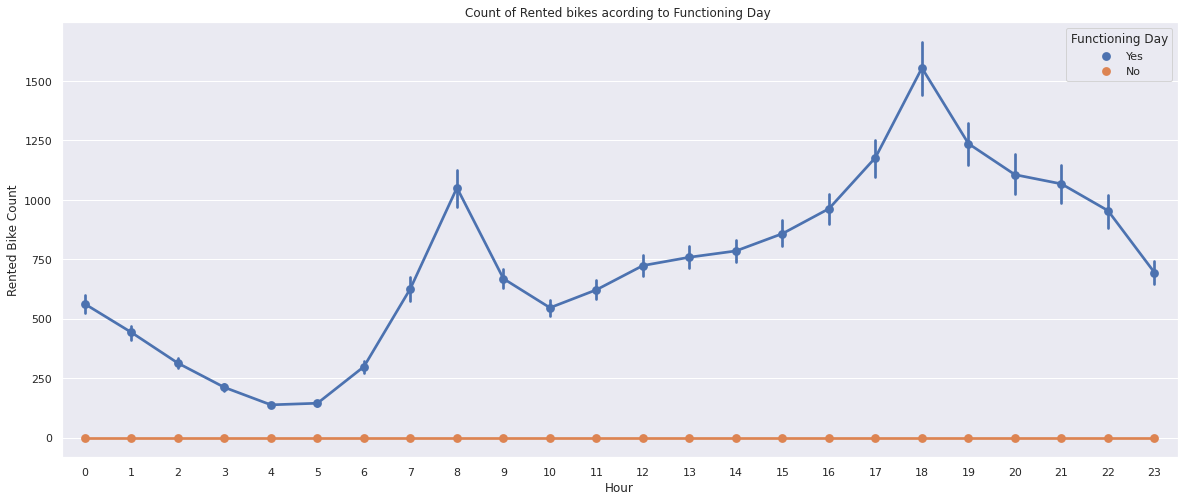

In [376]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='Count of Rented bikes acording to Functioning Day ')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


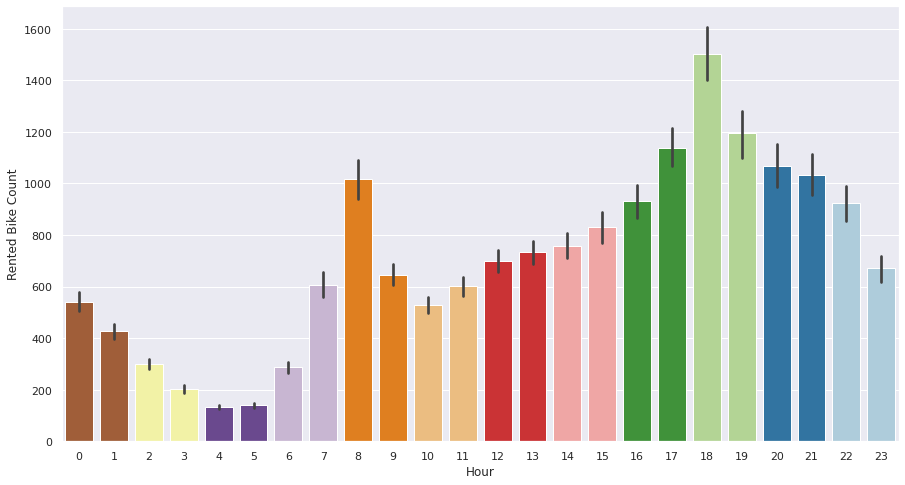

In [377]:
# how much hour are bike was rented

plt.figure(figsize=(15,8))
sns.barplot('Hour','Rented Bike Count', data = bike_df,palette='Paired_r')

* **Above plot show that the bike was rented mostly on morning and evening time**.**This is because people not having personal vehicle, commuting to offices and schools tend to rent bikes.**
* **generally people use rented bikes during their working hour from 7am to 9am and 5pm to 7pm.**

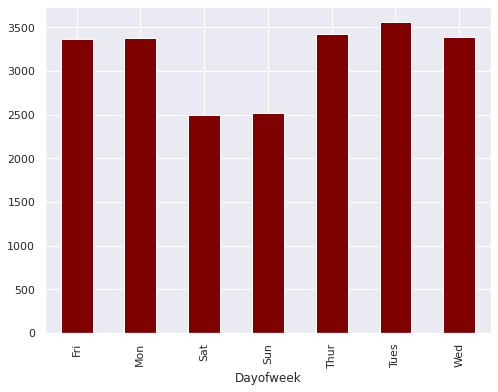

In [378]:
#showing on which day the bike was rented most

plt.figure(figsize=(8,6))
bike_df.groupby('Dayofweek')['Rented Bike Count'].max().plot(kind='bar',color = 'maroon')

**Above graph shows that most of the bike rented on weekdays and less on weekends**

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend ')]

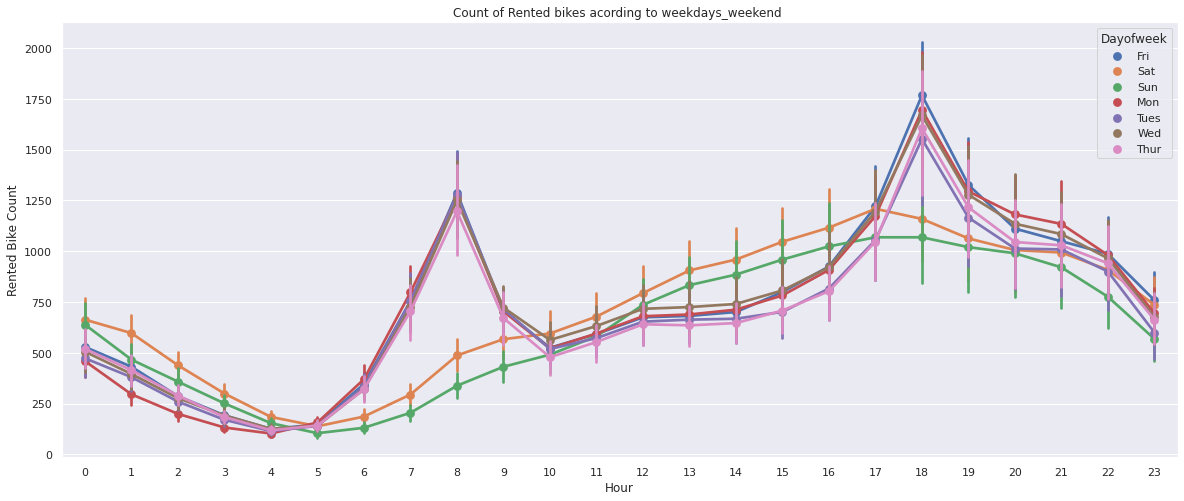

In [379]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_df,x='Hour',y='Rented Bike Count',hue=bike_df['Dayofweek'],ax=ax)
ax.set(title='Count of Rented bikes acording to weekdays_weekend ')

# **Analyze of Numerical variables**
**What is Numerical Data?**

* **Numerical data is a data type expressed in numbers, rather than natural language description. Sometimes called quantitative data, numerical data is always collected in number form. Numerical data differentiates itself from other number form data types with its ability to carry out arithmetic operations with these numbers.**

##Analyze of Numerical variables distplots

In [380]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(bike_df.groupby('Rainfall(mm)')['Rented Bike Count'].sum())

In [381]:
# resetting index of the dataframe

df_rain.reset_index(inplace=True)

In [382]:
df_rain.head()

,Rainfall(mm),Rented Bike Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


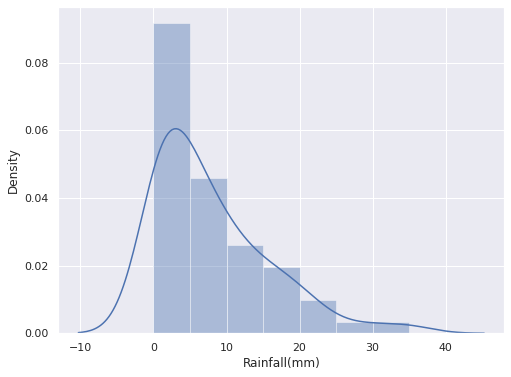

In [383]:
# plot showing distribution of bike rentals according to rainfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_rain['Rainfall(mm)'])

**Above plot shows that people tend to rent bikes when there is no or less rainfall.**

In [384]:
# creating a dataframe containing the count of bikes rented in differant intensities of snowfall

df_snow = pd.DataFrame(bike_df.groupby('Snowfall (cm)')['Rented Bike Count'].sum())

In [385]:
df_snow.reset_index(inplace=True)

In [386]:
df_snow.head()

,Snowfall (cm),Rented Bike Count
0,0.0,6090314
1,0.1,205
2,0.2,3643
3,0.3,8304
4,0.4,5981


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


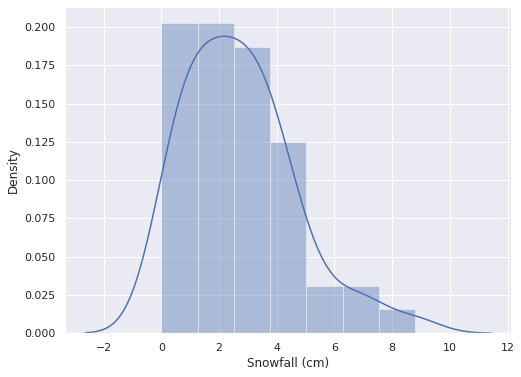

In [387]:
# plot showing distribution of bike rentals according to snowfall intensity

plt.figure(figsize=(8,6))
sns.distplot(df_snow['Snowfall (cm)'])

**Above plot shows that people tend to rent bikes when there is no or less snowfall.**

In [388]:
# creating a dataframe containing the count of bikes rented in differant intensities of rainfall

df_temp = pd.DataFrame(bike_df.groupby('Temperature(°C)')['Rented Bike Count'].sum())
df_temp.reset_index(inplace=True)

In [389]:
df_temp.head()

,Temperature(°C),Rented Bike Count
0,-17.8,322
1,-17.5,291
2,-17.4,64
3,-16.9,36
4,-16.5,96


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


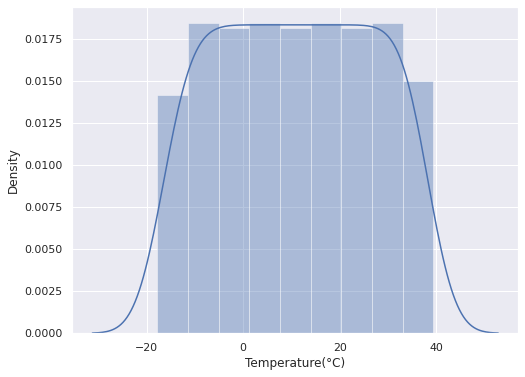

In [390]:
# plot showing distribution of bike rentals according to temperature intensity

plt.figure(figsize=(8,6))
sns.distplot(df_temp['Temperature(°C)'])

**Above plot shows that people tend to rent bikes when the temperature is between -5 to 25 degrees.**

In [391]:
# creating a dataframe containing the count of bikes rented in differant visibility ranges

df_visi = pd.DataFrame(bike_df.groupby('Visibility (10m)')['Rented Bike Count'].sum())
df_visi.reset_index(inplace=True)

In [392]:
df_visi.head()

,Visibility (10m),Rented Bike Count
0,27,83
1,33,33
2,34,24
3,38,98
4,53,65


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


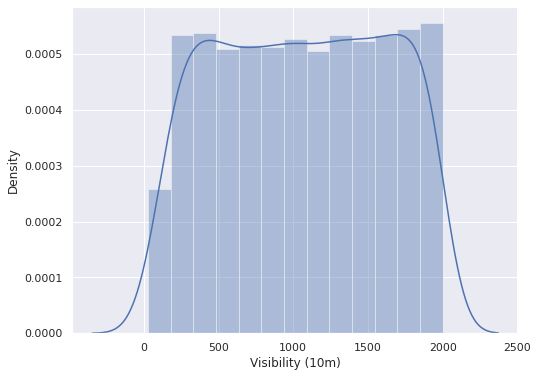

In [393]:
plt.figure(figsize=(8,6))
sns.distplot(df_visi['Visibility (10m)'])

**Above plot shows that people tend to rent bikes when the visibility is between 300 to 1700.**

# **Removing outliers**

In [394]:
# finding the inter-quartile range 

Q1 = bike_df.quantile(0.25)
Q3 = bike_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
year                            0.00
dtype: float64


In [395]:
# listing features to remove outliers

features = list(bike_df.columns)
features = features[2:]
list_0 = ['Hour','Seasons','Holiday','Functioning Day','month','year','Dayofweek']
new_features = [x for x in features if x not in list_0]

In [396]:
new_features 

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [397]:
# removing outliers

bike_df[new_features] = bike_df[new_features][~((bike_df[new_features] < (Q1 - 1.5 * IQR)) |(bike_df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until


In [398]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            7078 non-null   float64       
 4   Humidity(%)                7078 non-null   float64       
 5   Wind speed (m/s)           7078 non-null   float64       
 6   Visibility (10m)           7078 non-null   float64       
 7   Dew point temperature(°C)  7078 non-null   float64       
 8   Solar Radiation (MJ/m2)    7078 non-null   float64       
 9   Rainfall(mm)               7078 non-null   float64       
 10  Snowfall (cm)              7078 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

# **Looking at the distribution of target variable**
##**normalise the 'Rented Bike Count' column data**

* **The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


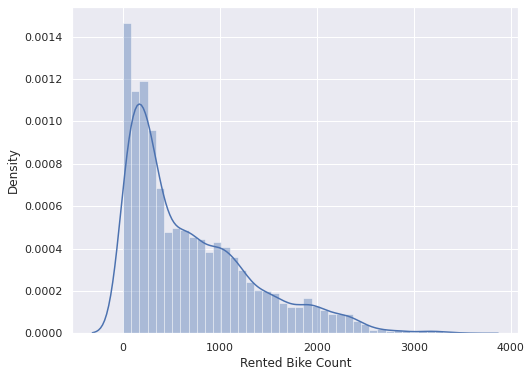

In [399]:
# Dependent variable 'Rented Bike Count'

plt.figure(figsize=(8,6))
sns.distplot(bike_df['Rented Bike Count'],color="b")

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**


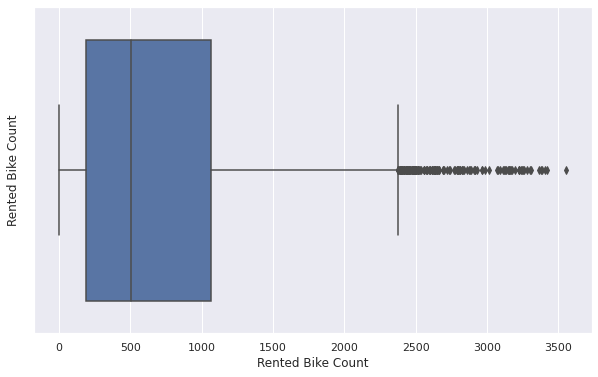

In [400]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented Bike Count')
sns.boxplot(x=bike_df['Rented Bike Count'])
plt.show()

* **The above boxplot shows that we have detect outliers in Rented Bike Count column.**

In [401]:
# Here are the nimerical features of our dataset

numeric_features = bike_df.describe().columns
numeric_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'year'],
      dtype='object')

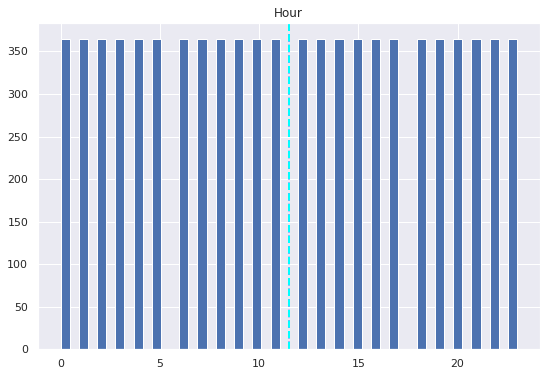

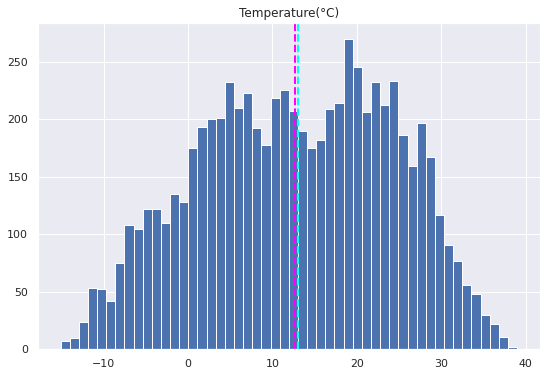

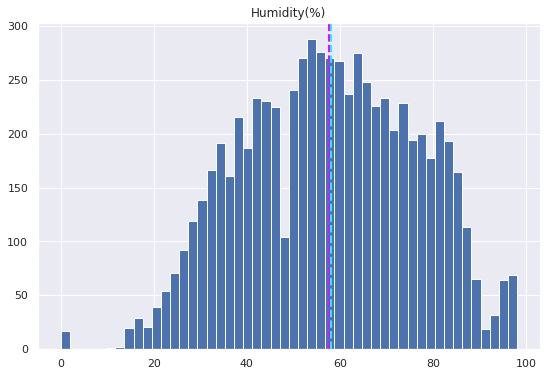

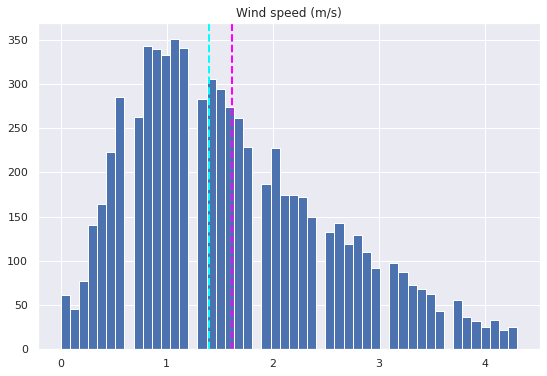

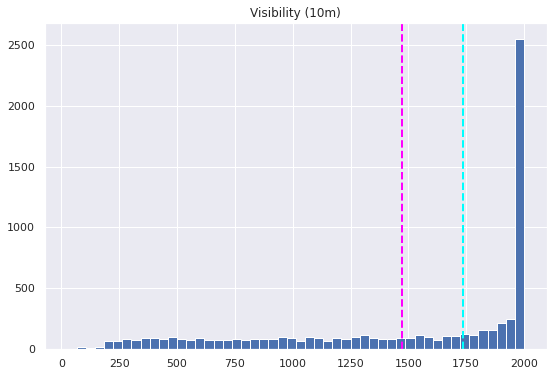

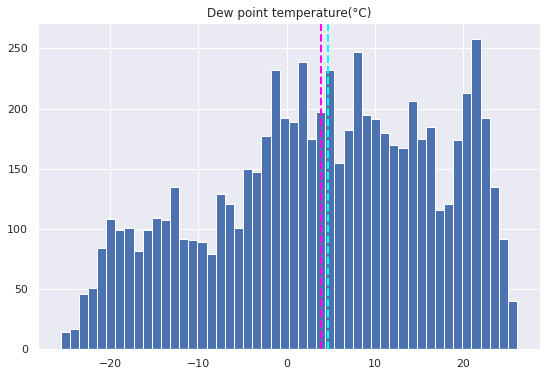

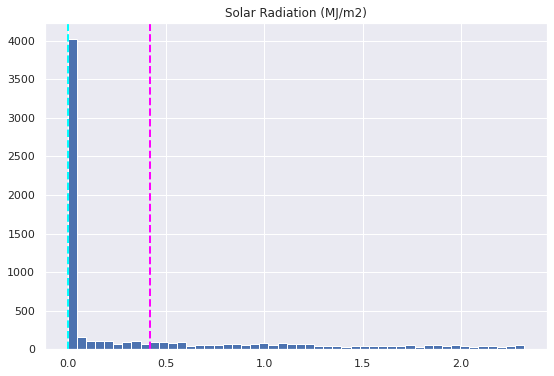

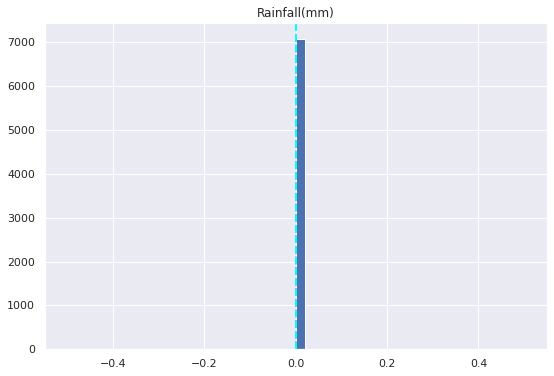

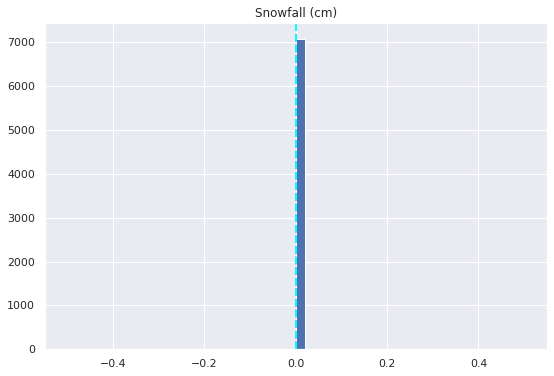

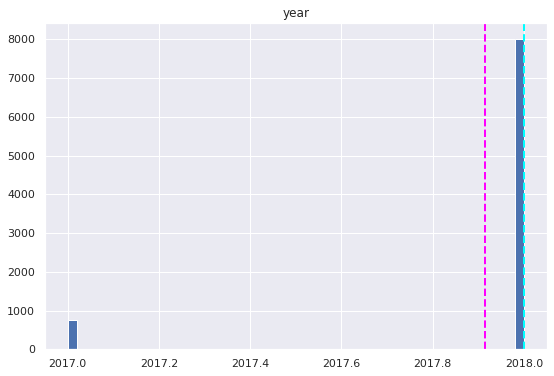

In [402]:
# plot a bar plot for each numerical feature count

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **sqrt transformation of target features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


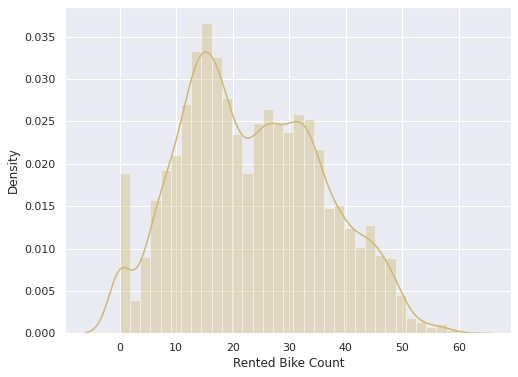

In [403]:
# Applying square root to Rented Bike Count to improve skewness

plt.figure(figsize=(8,6))
sns.distplot(np.sqrt(bike_df['Rented Bike Count']),color="y") # normalise 'Rented Bike Count' column data

* **Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.**


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


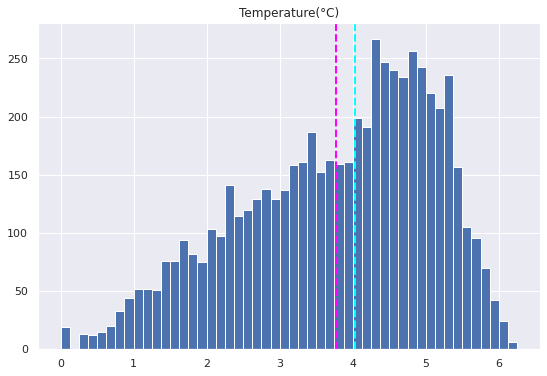

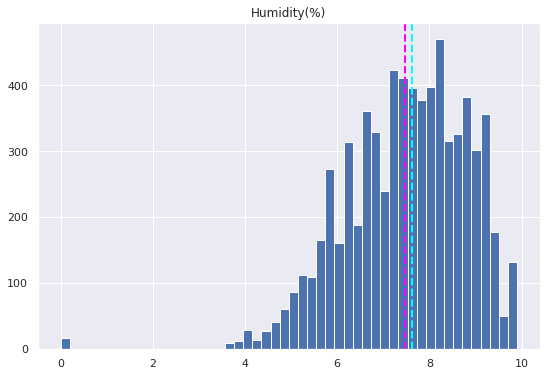

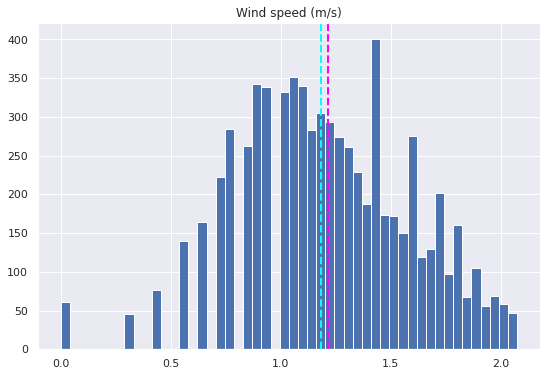

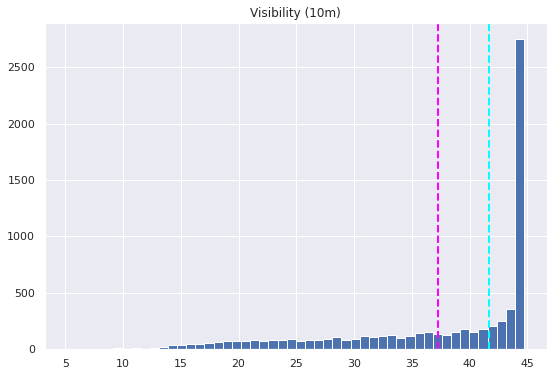

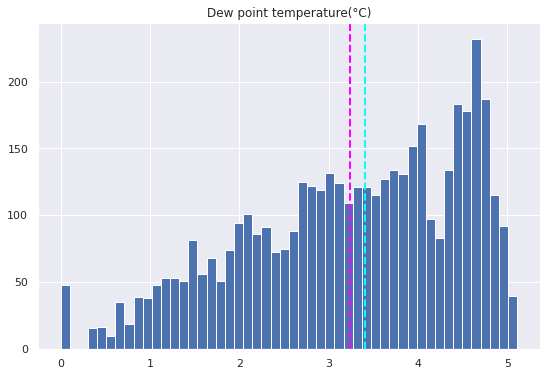

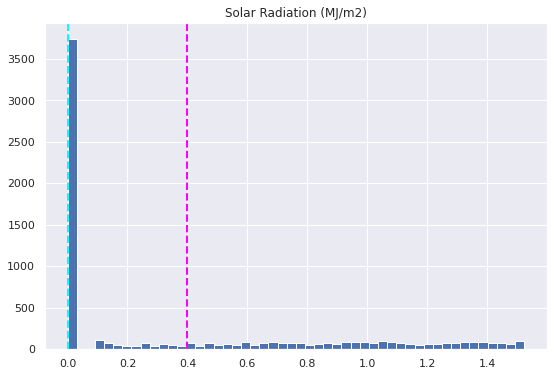

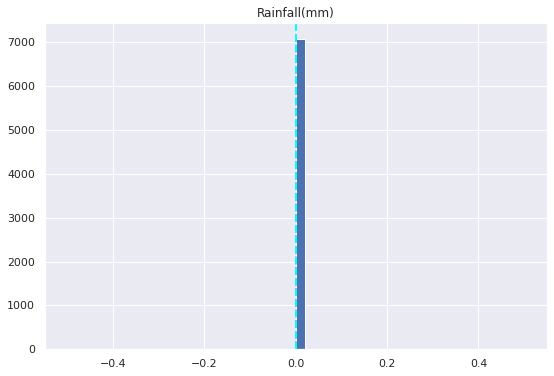

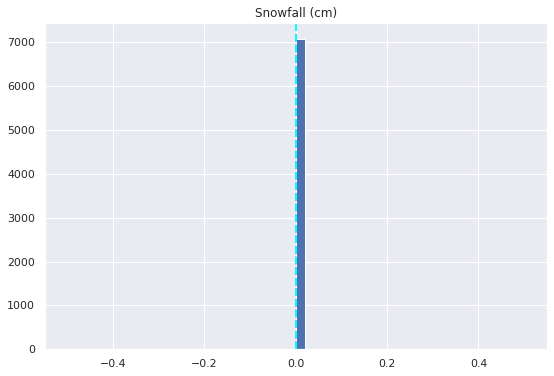

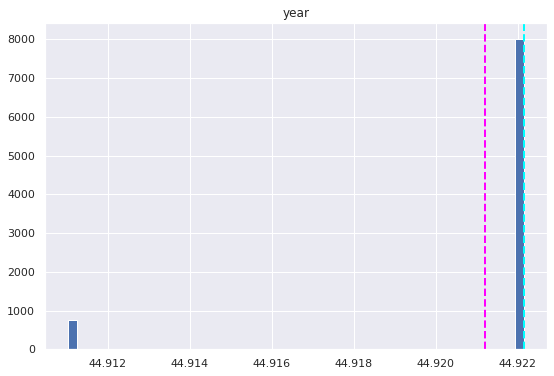

In [404]:
for col in numeric_features[2:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(bike_df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

# **Correlation of independent features with dependent features**

# **Heatmap**

* **we check correletion betweeen variables using Correlation heatmap, it is graphical representation of correlation matrix representing correlation between different variables.**

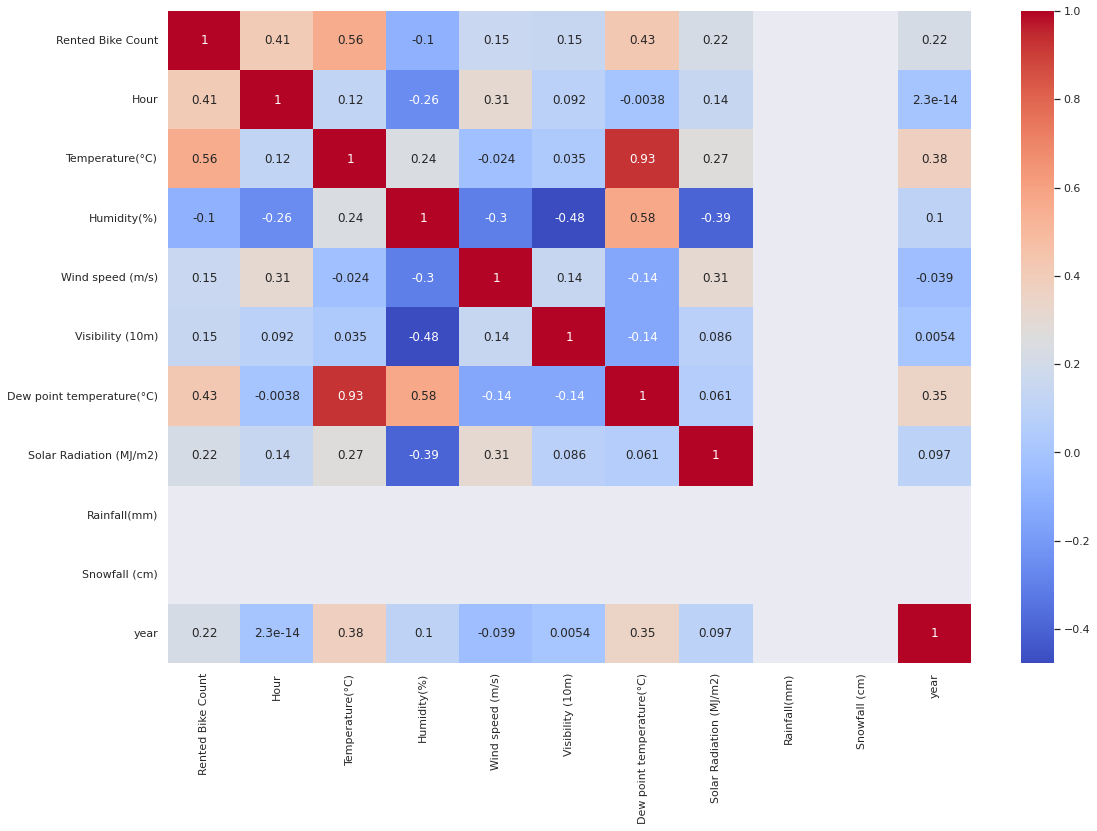

In [406]:
# extracting correlation heatmap

plt.figure(figsize = (18,12))
sns.heatmap(bike_df.corr(), annot = True, cmap="coolwarm")
plt.show()


# **Label Encoding**

In [407]:
# creating dummy variables for categorical feature --> Seasons, month, DayOfWeek, year, fuctioning day, holiday

seasons = pd.get_dummies(bike_df['Seasons'])

working_day = pd.get_dummies(bike_df['Holiday'])

F_day = pd.get_dummies(bike_df['Functioning Day'])

month = pd.get_dummies(bike_df['month'])

week_day = pd.get_dummies(bike_df['Dayofweek'])

year = pd.get_dummies(bike_df['year'])

In [408]:
bike_df = pd.concat([bike_df,seasons,working_day,F_day,month,week_day,year],axis=1)

In [409]:
# checking the data dummy variable is created or not

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),...,Sep,Fri,Mon,Sat,Sun,Thur,Tues,Wed,2017,2018
0,2017-12-01,254,0,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,2017-12-01,204,1,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,2017-12-01,173,2,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,2017-12-01,107,3,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,2017-12-01,78,4,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0


In [410]:
## dropping columns for which dummy variables were created

bike_df.drop(['Seasons','Holiday','Functioning Day','Dayofweek','month','year'],axis=1,inplace=True)

In [411]:
bike_df.drop(['Date'],axis=1,inplace=True) # droping date because we already extract the date from the data